In [1]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")   

In [2]:
df_train = pd.read_csv('data/data_train.csv')
df_train.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298
0,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = df_train.drop('target', axis=1)   
y_train = df_train['target']

In [4]:
pipeline = Pipeline([
    ('SGD_clf',  SGDClassifier(loss='log_loss', max_iter=1000, penalty='l2', shuffle=True, random_state=5))
])

In [16]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross val - AUC avg: {scores.mean()}")

Cross val - AUC avg: 0.6456692107710241


In [17]:
scores_df = pd.DataFrame(scores, columns=['AUC Score'])
scores_df['Fold'] = range(1, len(scores) + 1)
mean_score = scores.mean()
std_score = scores.std()
scores_df['Mean'] = mean_score
scores_df['Std'] = std_score
scores_df

,AUC Score,Fold,Mean,Std
0,0.647275,1,0.645669,0.007238
1,0.655651,2,0.645669,0.007238
2,0.642281,3,0.645669,0.007238
3,0.633999,4,0.645669,0.007238
4,0.649141,5,0.645669,0.007238


In [5]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('SGD_clf', SGDClassifier(loss='log_loss', random_state=5))])

#### Model evaluation

In [6]:
from utils import *

In [7]:
df_test = pd.read_csv('data/data_test.csv')
X_test = df_test.drop('target', axis=1)   
y_test = df_test['target']

In [8]:
df_test['pred_proba-SGD'] = pipeline.predict_proba(X_test)[:, 1]
df_test['pred-SGD'] = pipeline.predict(X_test)

In [10]:
metrics_df = calculate_metrics(df_test['pred_proba-SGD'],df_test['pred-SGD'],df_test['target'])
metrics_df

,Metric,Score
0,Average Precision Score,0.705216
1,Recall,0.533333
2,F1 Score,0.601455
3,AUC,0.644513
4,Brier Score,0.237970


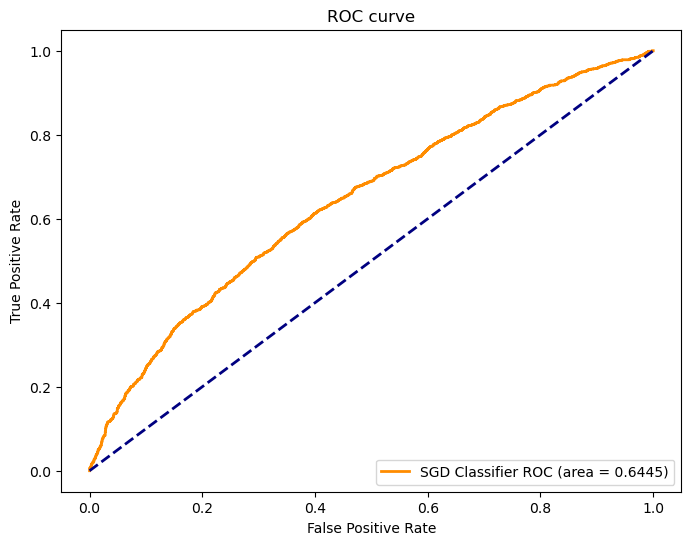

In [23]:
plot_roc_curve(df_test['pred_proba-SGD'], df_test['target'],  "SGD Classifier")

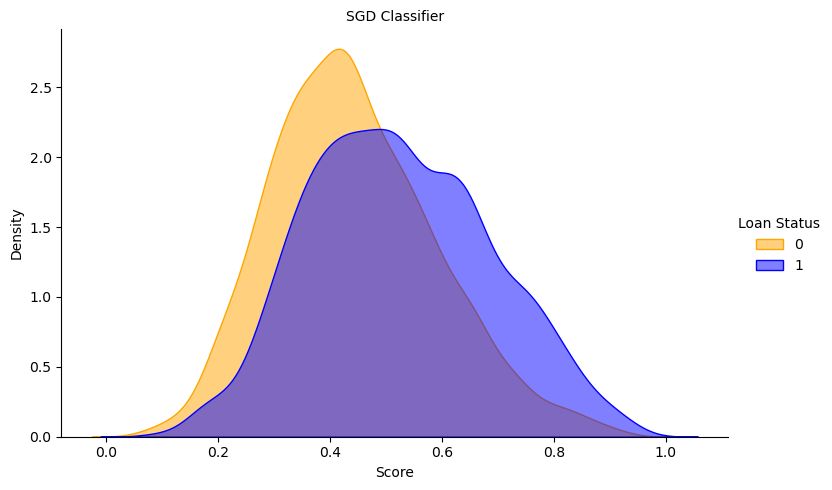

In [24]:
plot_density(df_test['pred_proba-SGD'], df_test['target'],  "SGD Classifier")

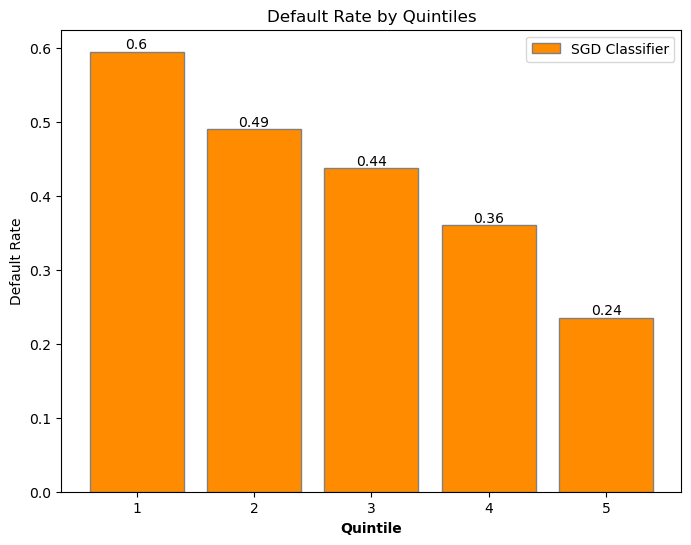

In [25]:
default_rate_by_quintile(df_test['pred_proba-SGD'], df_test['target'],  "SGD Classifier")